In [1]:
import illustris_python.groupcat as gc
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np
import h5py

%matplotlib inline

In [7]:
v_limit = 610
BoxID = 9
filename = '../data/pairs_box_{:02d}.hdf5'.format(BoxID)
data = {}
f = h5py.File(filename, 'r')
for k in f.keys():
    data[k] = f[k][...]
f.close()
print(data.keys())

dtype=[('BoxID','i8'), ('hubble', 'f8'), ('omega_de', 'f8'),
      ('omega_m', 'f8'), ('n_s', 'f8'), ('sigma_8', 'f8'), ('w_0', 'f8')]
cosmo_data = np.loadtxt("../data/box_cosmo_params.dat", dtype=dtype)
hubble = cosmo_data['hubble'][BoxID]
print(hubble)

dict_keys(['pos_A', 'pos_B', 'pos_G', 'vel_A', 'vel_B', 'vel_G', 'vmax_A', 'vmax_B', 'vmax_G'])
72.7


In [8]:
data['vel_A_mag'] = np.sqrt(np.sum(data['vel_A']**2, axis=1))
data['vel_B_mag'] = np.sqrt(np.sum(data['vel_B']**2, axis=1))
data['vel_G_mag'] = np.sqrt(np.sum(data['vel_G']**2, axis=1))

data['pos_AB'] = np.sqrt(np.sum( (data['pos_B'] - data['pos_A'])**2, axis=1))
data['vel_AB'] = np.sqrt(np.sum( (data['vel_B'] - data['vel_A'])**2, axis=1))
data['vel_AB_rad'] = np.sum((data['pos_B'] - data['pos_A'])*(data['vel_B'] - data['vel_A']), axis=1)/data['pos_AB']
data['vel_AB_tan'] = np.sqrt((data['vel_AB']**2 - data['vel_AB_rad']**2))


#now we compute the radial velocity including the hubble flow
data['vel_AB_rad'] = data['vel_AB_rad'] + (data['pos_AB'] * hubble)

datos = {}
ii = (data['pos_A'][:,0] > 10) & (data['pos_A'][:,0]<710)
keys = ['vel_A_mag', 'vel_B_mag', 'pos_AB', 'vel_AB', 'vel_AB_rad', 'vel_AB_tan', 'vmax_A', 'vmax_B']
for kk in keys:
    print(kk)
    datos[kk] = data[kk][ii]
keys = ['vel_G_mag', 'vmax_G']
for kk in keys:
    print(kk)
    datos[kk] = data[kk][:]

vel_A_mag
vel_B_mag
pos_AB
vel_AB
vel_AB_rad
vel_AB_tan
vmax_A
vmax_B
vel_G_mag
vmax_G


Text(0.5,1,'Npairs=226,  Nhalos=83354')

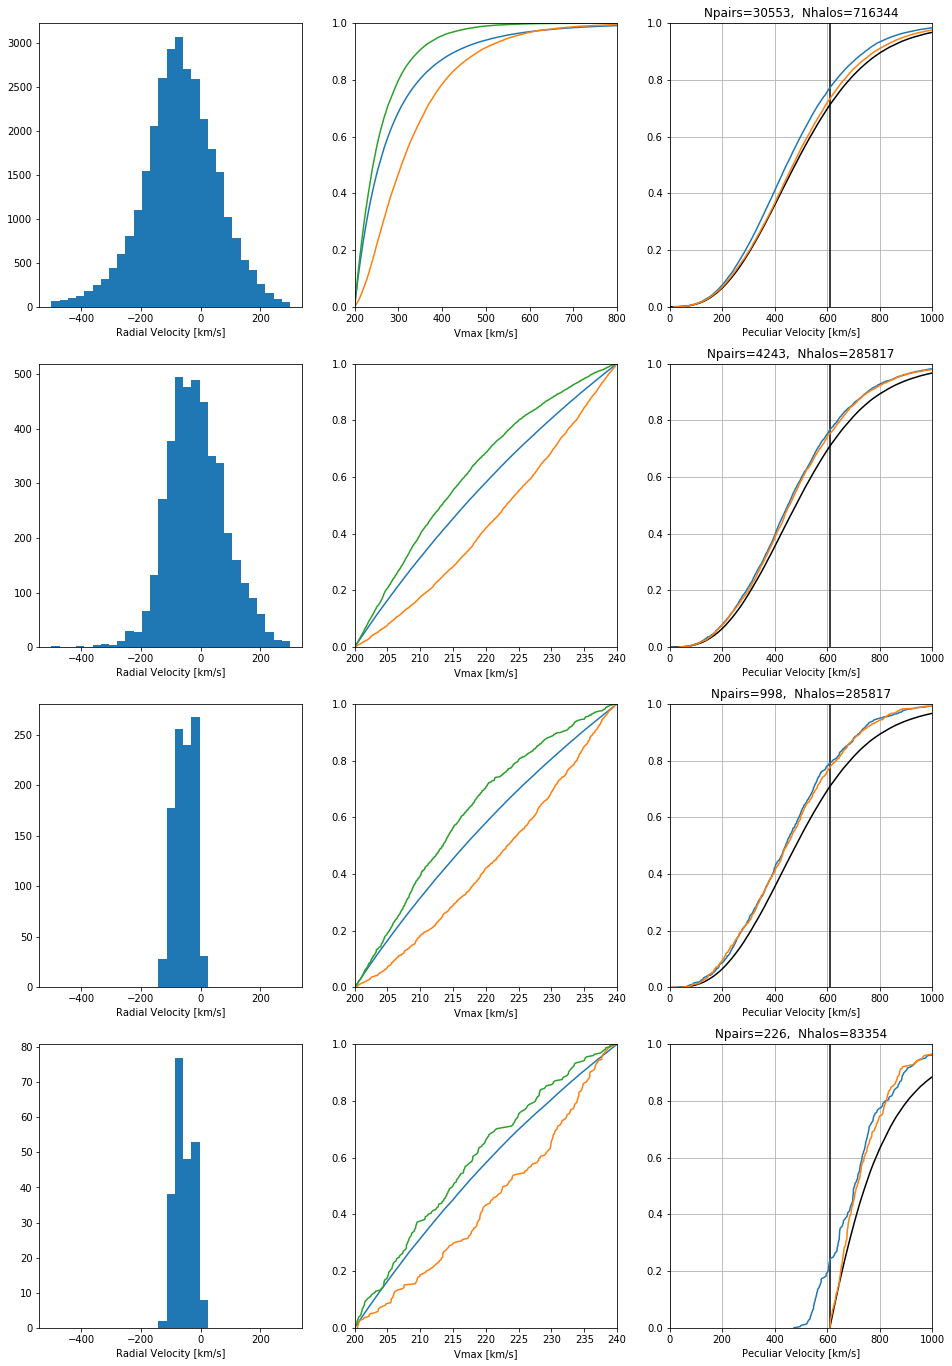

In [9]:
plt.figure(figsize=(16,24))

# Input sample
plt.subplot(4,3,1)
_ = plt.hist(datos['vel_AB_rad'], bins=np.linspace(-500,300, 30))
plt.xlabel("Radial Velocity [km/s]")

plt.subplot(4,3,2)
plt.plot(np.sort(datos['vmax_G']), np.linspace(0,1,len(datos['vmax_G'])))
plt.plot(np.sort(datos['vmax_A']), np.linspace(0,1,len(datos['vmax_A'])))
plt.plot(np.sort(datos['vmax_B']), np.linspace(0,1,len(datos['vmax_B'])))
plt.xlabel("Vmax [km/s]")
plt.xlim(200,800)
plt.ylim(0,1)

plt.subplot(4,3,3)
plt.plot(np.sort(datos['vel_G_mag']), np.linspace(0,1,len(datos['vel_G_mag'])), color='black')
plt.plot(np.sort(datos['vel_A_mag']), np.linspace(0,1,len(datos['vel_A_mag'])))
plt.plot(np.sort(datos['vel_B_mag']), np.linspace(0,1,len(datos['vel_B_mag'])))
plt.xlim(0,1000)
plt.ylim(0,1)
plt.vlines(v_limit, 0,1)
plt.xlabel("Peculiar Velocity [km/s]")
plt.grid()
plt.title('Npairs={}, '.format(len(datos['vel_AB_rad']))+' Nhalos={}'.format(len(datos['vmax_G'])))


# Selection in vmax
ii = ((datos['vmax_A'] < 240) & (datos['vmax_B']<240)) 
ll = (datos['vmax_G'] < 240)

plt.subplot(4,3,4)
_ = plt.hist(datos['vel_AB_rad'][ii], bins=np.linspace(-500,300, 30))
plt.xlabel("Radial Velocity [km/s]")



plt.subplot(4,3,5)
plt.plot(np.sort(datos['vmax_G'][ll]), np.linspace(0,1,len(datos['vmax_G'][ll])))
plt.plot(np.sort(datos['vmax_A'][ii]), np.linspace(0,1,len(datos['vmax_A'][ii])))
plt.plot(np.sort(datos['vmax_B'][ii]), np.linspace(0,1,len(datos['vmax_B'][ii])))
plt.xlabel("Vmax [km/s]")
plt.xlim(200,240)
plt.ylim(0,1)

plt.subplot(4,3,6)
plt.plot(np.sort(datos['vel_G_mag'][ll]), np.linspace(0,1,len(datos['vel_G_mag'][ll])), color='black')
plt.plot(np.sort(datos['vel_A_mag'][ii]), np.linspace(0,1,len(datos['vel_A_mag'][ii])))
plt.plot(np.sort(datos['vel_B_mag'][ii]), np.linspace(0,1,len(datos['vel_B_mag'][ii])))
plt.xlim(0,1000)
plt.ylim(0,1)
plt.vlines(v_limit, 0,1)
plt.xlabel("Peculiar Velocity [km/s]")
plt.grid()
plt.title('Npairs={}, '.format(len(datos['vel_AB_rad'][ii]))+' Nhalos={}'.format(len(datos['vmax_G'][ll])))


jj = (datos['vel_AB_rad'] < 0) & (datos['vel_AB_rad'] > -120) & (datos['vel_AB_tan'] < 80) 

# Selection in radial and tangential kinematics


plt.subplot(4,3,7)
_ = plt.hist(datos['vel_AB_rad'][ii&jj], bins=np.linspace(-500,300, 30))
plt.xlabel("Radial Velocity [km/s]")



plt.subplot(4,3,8)
plt.plot(np.sort(datos['vmax_G'][ll]), np.linspace(0,1,len(datos['vmax_G'][ll])))
plt.plot(np.sort(datos['vmax_A'][ii&jj]), np.linspace(0,1,len(datos['vmax_A'][ii&jj])))
plt.plot(np.sort(datos['vmax_B'][ii&jj]), np.linspace(0,1,len(datos['vmax_B'][ii&jj])))
plt.xlabel("Vmax [km/s]")
plt.xlim(200,240)
plt.ylim(0,1)

plt.subplot(4,3,9)
plt.plot(np.sort(datos['vel_G_mag'][ll]), np.linspace(0,1,len(datos['vel_G_mag'][ll])), color='black')
plt.plot(np.sort(datos['vel_A_mag'][ii&jj]), np.linspace(0,1,len(datos['vel_A_mag'][ii&jj])))
plt.plot(np.sort(datos['vel_B_mag'][ii&jj]), np.linspace(0,1,len(datos['vel_B_mag'][ii&jj])))
plt.xlim(0,1000)
plt.ylim(0,1)
plt.vlines(v_limit, 0,1)
plt.xlabel("Peculiar Velocity [km/s]")
plt.grid()
plt.title('Npairs={}, '.format(len(datos['vel_AB_rad'][ii&jj]))+' Nhalos={}'.format(len(datos['vmax_G'][ll])))



# Selection only about peculiar velocity

mm = datos['vel_B_mag'] > v_limit
nn = (datos['vel_G_mag'] > v_limit)

plt.subplot(4,3,10)
_ = plt.hist(datos['vel_AB_rad'][ii&jj&mm], bins=np.linspace(-500,300, 30))
plt.xlabel("Radial Velocity [km/s]")


plt.subplot(4,3,11)
plt.plot(np.sort(datos['vmax_G'][ll&nn]), np.linspace(0,1,len(datos['vmax_G'][ll&nn])))
plt.plot(np.sort(datos['vmax_A'][ii&jj&mm]), np.linspace(0,1,len(datos['vmax_A'][ii&jj&mm])))
plt.plot(np.sort(datos['vmax_B'][ii&jj&mm]), np.linspace(0,1,len(datos['vmax_B'][ii&jj&mm])))
plt.xlabel("Vmax [km/s]")
plt.xlim(200,240)
plt.ylim(0,1)

plt.subplot(4,3,12)
plt.plot(np.sort(datos['vel_G_mag'][ll&nn]), np.linspace(0,1,len(datos['vel_G_mag'][ll&nn])), color='black')
plt.plot(np.sort(datos['vel_A_mag'][ii&jj&mm]), np.linspace(0,1,len(datos['vel_A_mag'][ii&jj&mm])))
plt.plot(np.sort(datos['vel_B_mag'][ii&jj&mm]), np.linspace(0,1,len(datos['vel_B_mag'][ii&jj&mm])))
plt.xlim(0,1000)
plt.ylim(0,1)
plt.vlines(v_limit, 0,1)
plt.xlabel("Peculiar Velocity [km/s]")
plt.grid()
plt.title('Npairs={}, '.format(len(datos['vel_AB_rad'][ii&jj&mm]))+' Nhalos={}'.format(len(datos['vmax_G'][ll&nn])))

